# Kaplan-Meyer

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# kmf
kmf = KaplanMeierFitter()

# read data
data = pd.read_csv('data/Data.csv', encoding='latin1')

# keep only required columns
data = data[[
    'Date',
    'Winner',
    'Loser',
    'Surface'
]]

# keep only data mentioning Federer, Nadal or Djokovic
data = data[
    (data['Winner'] == 'Federer R.') |
    (data['Winner'] == 'Nadal R.') |
    (data['Winner'] == 'Djokovic N.') |
    (data['Loser'] == 'Federer R.') |
    (data['Loser'] == 'Nadal R.') |
    (data['Loser'] == 'Djokovic N.')
]

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# keep only data starting 2008
data = data[data['Date'] >= '2008-01-01']
data

/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/3704348756.py:10: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Data.csv', encoding='latin1')


,Date,Winner,Loser,Surface
23183,2008-01-01,Nadal R.,Montcourt M.,Hard
23195,2008-01-03,Nadal R.,Ram R.,Hard
23198,2008-01-04,Nadal R.,Garcia-Lopez G.,Hard
23202,2008-01-05,Nadal R.,Moya C.,Hard
23203,2008-01-06,Youzhny M.,Nadal R.,Hard
...,...,...,...,...
46585,2016-09-04,Pouille L.,Nadal R.,Hard
46586,2016-09-05,Djokovic N.,Edmund K.,Hard
46592,2016-09-07,Djokovic N.,Tsonga J.W.,Hard
46595,2016-09-09,Djokovic N.,Monfils G.,Hard


In [41]:
def plot_kmp(data, player, surface, ax):
    ''' Plot the Kaplan-Meier survival function for a player '''

    # keep only data for the specified surface
    data = data[data['Surface'] == surface]

    # extract data for Federer
    tmp = data[
        (data['Winner'] == player) |
        (data['Loser'] == player)
    ]

    # add status column with 0 for Federer's wins and 1 for losses
    tmp['Status'] = 0
    tmp.loc[tmp['Loser'] == player, 'Status'] = 1

    # remove columns Winner and Loser
    tmp = tmp.drop(columns=['Winner', 'Loser'])

    # calculate streak length in the dataset
    streak_length = []
    current_streak = 0
    for status in tmp['Status']:
        if status == 0:
            current_streak += 1
        else:
            streak_length.append(current_streak)
            current_streak = 0

    # fit the kmf
    kmf.fit(
        durations=streak_length,
        event_observed=np.ones(len(streak_length)),
        label=player
    )

    # plot the kmf
    kmf.plot_survival_function(ax=ax)

First let's see the "survival" of top 3 on clay

/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Status'] = 0
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Status'] = 0
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Text(0, 0.5, 'Survival')

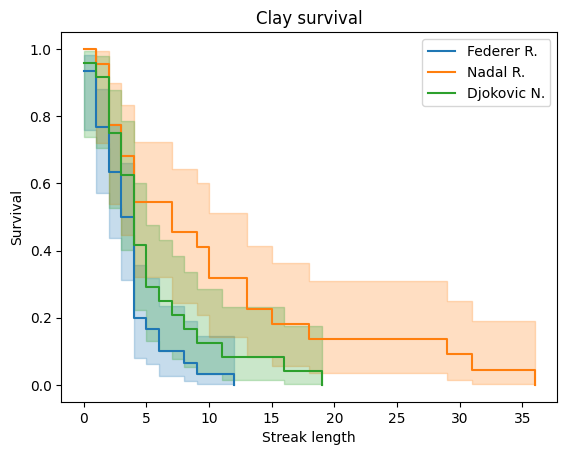

In [49]:
ax = plt.subplot(111)
plot_kmp(data, 'Federer R.', 'Clay', ax)
plot_kmp(data, 'Nadal R.', 'Clay', ax)
plot_kmp(data, 'Djokovic N.', 'Clay', ax)
plt.title('Clay survival')
plt.xlabel('Streak length')
plt.ylabel('Survival')
#plt.savefig('clay_survival.png')

Now let's see the "survival" of top 3 on hard

/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Status'] = 0
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Status'] = 0
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Text(0, 0.5, 'Survival')

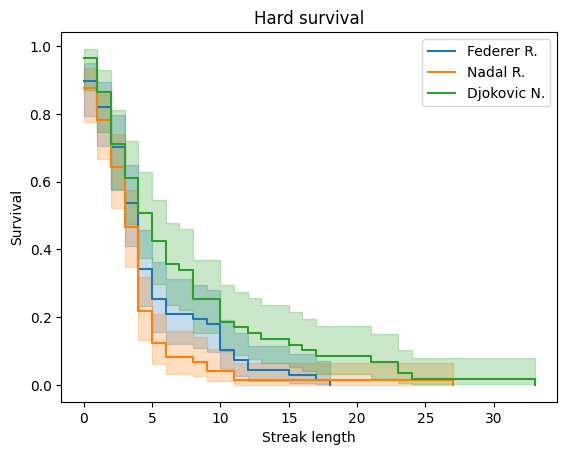

In [46]:
ax = plt.subplot(111)
plot_kmp(data, 'Federer R.', 'Hard', ax)
plot_kmp(data, 'Nadal R.', 'Hard', ax)
plot_kmp(data, 'Djokovic N.', 'Hard', ax)
plt.title('Hard survival')
plt.xlabel('Streak length')
plt.ylabel('Survival')

Finally let's see the "survival" of top 3 on grass

/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Status'] = 0
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['Status'] = 0
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/2491278388.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Text(0, 0.5, 'Survival')

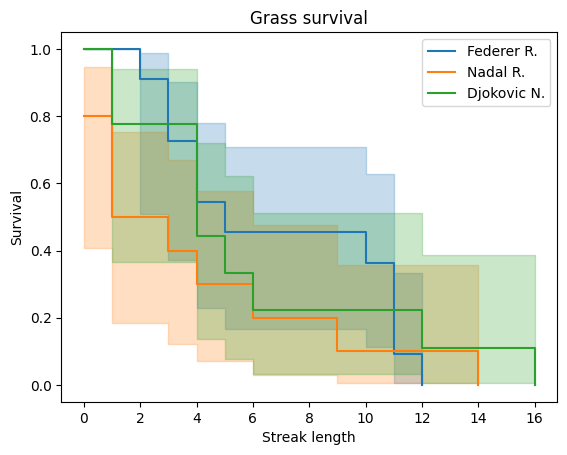

In [47]:
ax = plt.subplot(111)
plot_kmp(data, 'Federer R.', 'Grass', ax)
plot_kmp(data, 'Nadal R.', 'Grass', ax)
plot_kmp(data, 'Djokovic N.', 'Grass', ax)
plt.title('Grass survival')
plt.xlabel('Streak length')
plt.ylabel('Survival')

# Cox Survival Regression of Nadal streaks

In [111]:
# read data
data = pd.read_csv('data/Data.csv', encoding='latin1')

# keep only required columns
data = data[[
    'Date',
    'Series',
    'Court',
    'Winner',
    'Loser',
    'Surface',
    'Best of'
]]

# keep only data mentioning Federer, Nadal or Djokovic
data = data[
    (data['Winner'] == 'Nadal R.') |
    (data['Loser'] == 'Nadal R.')
]

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# keep only data starting 2008
data = data[data['Date'] >= '2008-01-01']

# add status column
data['Status'] = 0
data.loc[data['Loser'] == 'Nadal R.', 'Status'] = 1

# drop columns
data = data.drop(columns=['Winner', 'Loser', 'Date'])

# rename Best of
data = data.rename(columns={'Best of': 'Best_of'})

# add streak column
streaks = []
current_streak = 0
for status in data['Status']:
    if status == 0:
        current_streak += 1
        streaks.append(current_streak)
    else:
        streaks.append(current_streak)
        current_streak = 0
data['Streak'] = streaks

# remove rows with Nans
data = data.dropna()

# one hot encode the categorical columns
data = pd.get_dummies(data, columns=[
    'Series',
    'Court',
    'Surface',
], dtype='int')
data

/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/3923711223.py:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Data.csv', encoding='latin1')


,Best_of,Status,Streak,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard
23183,3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
23195,3,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,1
23198,3,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1
23202,3,0,4,0,0,0,1,0,0,0,0,0,1,0,0,0,1
23203,3,1,4,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46412,3,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
46484,5,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
46550,5,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1
46574,5,0,3,0,0,1,0,0,0,0,0,0,1,0,0,0,1


/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/58420756.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rolad_Garos = data[data['Surface_Clay'] == 1][data['Series_Grand Slam'] == 1].iloc[0]
/var/folders/4d/ycr0kn4x3bx00_vwr13b2f140000gn/T/ipykernel_92299/58420756.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Wimbledon = data[data['Surface_Grass'] == 1][data['Series_Grand Slam'] == 1].iloc[0]


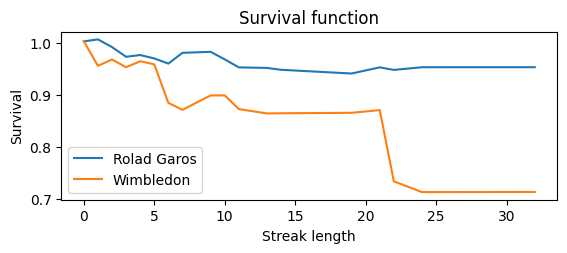

In [125]:
from lifelines import AalenAdditiveFitter

# fit the Aalen model
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=False)
aaf.fit(data, 'Streak', event_col='Status')

# predict survival
Rolad_Garos = data[data['Surface_Clay'] == 1][data['Series_Grand Slam'] == 1].iloc[0]
Wimbledon = data[data['Surface_Grass'] == 1][data['Series_Grand Slam'] == 1].iloc[0]

ax = plt.subplot(2,1,2)
aaf.predict_survival_function(Rolad_Garos).plot(ax=ax)
aaf.predict_survival_function(Wimbledon).plot(ax=ax)
ax.legend(['Rolad Garos', 'Wimbledon'])
plt.title('Survival function')
plt.xlabel('Streak length')
plt.ylabel('Survival')
plt.savefig('survival_nadal.png')